## Residency Matching Simulation

The NRMP (National Residency Matching Program) is used to match medical graduates to the optimal residency positions.

The Gale-Shapley algorithm as applied to the residency matching situation is as follows:

1.) Initially, all doctors rank hospitals based on preference, and the hospitals do the same with doctors.

2.) Each doctor presents an offer to his/her first choice.

3.) If any hospital has multiple offers, the hospital chooses its first choice and rejects the rest.

4.) Each of the rejected doctors then presents an offer to his/her next choice.

5.) Go back to step 3 and continue.

6.) The hospitals pick their first choice and the rejected doctors continue presenting offers to their next choice until every doctor is matched up to a hospital.

(https://blogs.cornell.edu/info2040/2016/09/16/matching-doctors-to-residencies-and-the-gale-shapley-algorithm/)

### Part 1: The Gale-Shapely Algorithm

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Gale-Shapely Algorithm for finding a stable matching:
def f_Gale_Shapely(Students,Schools,N):
    # Inputs:
    # Students: Matrix in which each row is an ordered list of the preferences of each student
    # Schools: Matrix in which each row is an ordered list of the preferences of each school
    # N: Number of students/school slots
    
    # Outputs:
    # matches: Array whose ith element is the index of the student to which school i has matched
    # has_proposed: # Matrix with ijth element 1 if student i has proposed to school j and 0 otherwise
    
    # Initializations:
    are_schools_matched = np.zeros(N) # Array recording whether each school is matched (1 for yes, 0 for no)
    matches = np.zeros(N) # Array recording which student each school is matched to
    has_proposed = np.zeros((N,N)) # Matrix with ijth element 1 if student i has proposed to school j and 0 otherwise
    unmatched_students = np.arange(N) # Array of unmatched students
    L = N # Number of unmatched students
    
    while L>0: # While some students are unmatched
        student_idx = np.random.choice(unmatched_students) # Pick an unmatched student
        student_preferences = Students[student_idx] # Get that student's list of preferred schools
        has_proposed_i = has_proposed[student_idx] # Has this student proposed? (1 = yes, 0 = no)
        # Of the schools they haven't already proposed to, get the index of the student's top choice in student_preferences:
        top_choice = (has_proposed_i==0).argmax(axis=0) # (The index of the first entry of has_proposed_i that is 0)
        has_proposed[student_idx,top_choice] = 1 # Update matrix of students that have proposed to schools
        school_idx = int(student_preferences[top_choice]) # The index of the student's top choice
        school_preferences = Schools[school_idx] # The preference list for this school

        # If school is not yet matched, add the matching:
        if are_schools_matched[school_idx] == 0:
            are_schools_matched[school_idx] = 1 #  Update are_schools_matched to designate that school is matched
            matches[school_idx] = student_idx # Update matches to show that this school is matched to this student
            student_idx2 = np.where(unmatched_students == student_idx)[0][0] # Index of student_idx in unmatched_students
            unmatched_students = np.delete(unmatched_students,student_idx2) # Remove current student from array of unmatched students
        # If school is already matched, determine which match is preferred and add this matching:
        else:
            old_student_idx = int(matches[school_idx]) # Index of currently-matched student
            # Rank of proposing student in proposee school's preference list:
            new_student_rank = np.where(school_preferences==student_idx)[0][0]
            # Rank of currently-matched student in proposee school's preference list:
            old_student_rank = np.where(school_preferences==old_student_idx)[0][0]
            # If new student is preferred over currently-matched student:
            # (The sign is "less-than" because preferences are recorded from left to right in the school_preferences array)
            if new_student_rank < old_student_rank:
                matches[school_idx] = student_idx # Add the new matching
                student_idx2 = np.where(unmatched_students == student_idx)[0][0] # Index of student_idx in unmatched_students
                unmatched_students = np.delete(unmatched_students,student_idx2) # Remove current student from array of unmatched students
                unmatched_students = np.append(unmatched_students,old_student_idx) # Add formerly-matched student to list of unmatched students
        L = np.shape(unmatched_students)[0] # Number of unmatched students
        
    return matches, has_proposed

In [3]:
N = 50 # Number of students/schools
# Initialize Students and Schools:
Students = np.zeros((N,N)) # Matrix in which each row is an ordered list of the preferences of each student
Schools = np.zeros((N,N)) # Matrix in which each row is an ordered list of the preferences of each school
# Generate ordered preference lists:
for i in np.arange(N):
    students = np.arange(N)
    Students[i,:] = students
    schools = np.arange(N)
    Schools[i,:] = schools

# Test on ordered preference lists:
matches, has_proposed = f_Gale_Shapely(Students,Schools,N)
print(matches)
print(has_proposed)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


In [4]:
N = 50 # Number of students/schools
# Initialize Students and Schools:
Students = np.zeros((N,N)) # Matrix in which each row is an ordered list of the preferences of each student
Schools = np.zeros((N,N)) # Matrix in which each row is an ordered list of the preferences of each school
# Generate randomly shuffled preference lists:
for i in np.arange(N):
    students = np.arange(N)
    np.random.shuffle(students)
    Students[i,:] = students
    schools = np.arange(N)
    np.random.shuffle(schools)
    Schools[i,:] = schools

# Test on randomly shuffled preference lists:
matches, has_proposed = f_Gale_Shapely(Students,Schools,N)
print(matches)
print(has_proposed)

[29.  3. 24. 22. 36.  1. 30. 13.  7. 28. 46. 11. 34. 20. 16. 41. 17. 10.
 38. 44. 15.  4.  8.  9. 19. 31. 40. 35. 39. 48. 32. 45. 27. 25.  2. 42.
 47. 26. 12.  0. 33. 43.  5. 37. 21. 49. 23. 18. 14.  6.]
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


### Part 2: The Match

We will consider a doctor, "DW," appying to Emergency Medicine residency programs.

We make the following assumptions:

There are 16 programs: ["Alameda", "Hennepin", "USC", "Boston", "Sinai", "Denver","Emory", "Cook", "NYU", "SUNY", "UCSF", "Mich", "UCLA", "Detroit", "Stanford", "DC"]

The quotas for each school are: [12, 12, 17, 12, 15, 17, 19, 17, 15, 16, 10, 16, 16, 14, 16, 20], for a total of 244 slots.

There are 70% as many slots as applicants (345 applicants) (using data for 2020).

All 345 applicants are being considered for all 16 programs and only these programs. I define a "17th program," for the applicants that don't match.

I have assigned a rating to each program based on their ranking, whether they are located in a big city, and whether they are in California.

Student preference lists are determined by the school ratings + Gaussian noise.

Each student has a "grade" which follows a normal distribution.

Each school has a number of slots (up to its quota). The preferences of each slot are determined by the student grade + Gaussian noise. The Gaussian noise is independent for all slots (including for the same school.)

DW's "grade" is in the 85th percentile of the students who are applying.

In [5]:
# Get program and DW data:
def f_Data(DW_percentile,rating_exp):

    # Data for EM Programs:
    programs = np.array(["Alameda", "Hennepin", "USC", "Boston", "Sinai", "Denver","Emory", "Cook", "NYU", "SUNY", "UCSF", "Mich", "UCLA", "Detroit", "Stanford", "DC","No Match"]) # Program Names
    rating = np.array((19, 11, 26, 14, 5, 23, 11, 15, 5, 5, 7, 5, 22, 5, 7, 3))**rating_exp # Program ratings
    quotas = np.array((12, 12, 17, 12, 15, 17, 19, 17, 15, 16, 10, 16, 16, 14, 16, 20)) # Quotas for each program
    DW_list = np.array((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)) # DW's preference list

    # In 2020, there were 2,567 available positions for 3,640 applicants
    slots = int(np.sum(quotas)) # Number of slots
    N = applicants = int(slots*(3640/2567)) # Number of applicants
    quotas = np.append(quotas,applicants - slots) # Append the number of slots for the "No Match" category to "quotas"
    DW = int(DW_percentile*applicants) # The index of DW (If DW is in the 85th percentile, he is the 244th student)
    Np = 16 # Number of programs
    
    # Construct an array ranking DW's preference for all slots
    dw_list = np.zeros(N)
    i = DW
    quotas_so_far = 0
    for j in np.arange(Np+1):
        dw_list[quotas_so_far:(quotas_so_far+quotas[j])] = np.zeros(quotas[j])+DW_list[j]
        quotas_so_far += quotas[j]
    
    return programs, rating, quotas, dw_list, DW_list, DW

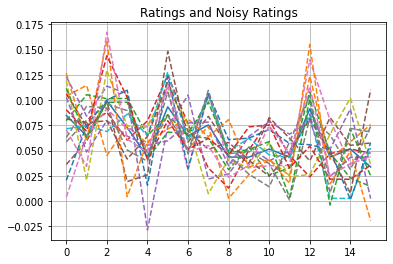

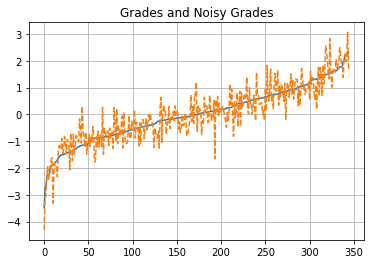

In [ ]:
# Test rating and grade functionality:

programs, rating, quotas, dw_list, DW_list, DW = f_Data(DW_percentile=0.85,rating_exp=0.5)
N = 345
Np = 16 # Number of programs

rating_n = rating/np.sum(rating) # Normalized ratings

plt.plot(rating_n)
for i in np.arange(Np+1):
    noisy_rating = rating_n + np.random.normal(0,np.max(rating_n)/4,Np) # Ratings +  noise
    noisy_rating /= np.sum(noisy_rating) # Normalize
    plt.plot(noisy_rating,'--')
plt.title("Ratings and Noisy Ratings")
plt.grid()
plt.show()

grade = np.sort(np.random.normal(0,1,N)) # Create student grades, following normal distribution
for i in np.arange(Np+1):
    noisy_grade = grade + np.random.normal(0,np.max(grade)/5,N) # Noisy grade
    
plt.plot(grade)
plt.plot(noisy_grade,'--')
plt.title("Grades and Noisy Grades")
plt.grid()
plt.show()

In [ ]:
# Generates N student preference lists
def f_Generate_Student_Preferences(quotas,rating_n,dw_list,DW_list,DW,N,Np,student_noise):

    Students = np.zeros((N,Np+1)) # Matrix in which each row is an ordered list of the preferred schools of each student

    for i in np.arange(N):
        noisy_rating = rating_n + np.random.normal(0,np.max(rating_n)*student_noise,Np) # Rating list for student i + Gaussian noise
        Students[i,0:Np] = np.flip(np.argsort(noisy_rating)) # Sorted list
        Students[i,Np] = Np # The least preferred category is always "No Match"

    Students = Students.astype('int')
    Students[DW,:] = DW_list # Put DW's preferences into the Students matrix

    # Matrix in which each row is an ordered list of the preferred slots of each student:
    # (For instance, if student i prefers school s, which as a quota q, the ith row of
    # Students_M has its first q elements equal to s.)
    Students_M = np.zeros((N,N))
    for i in np.arange(N):
        c=0
        for j in np.arange(Np+1):
            idx = np.where(Students[i,j]==dw_list)[0]
            L = np.shape(idx)[0]
            Students_M[i,c:c+L] = idx
            c += L

    return Students_M

In [ ]:
# Generates school preference lists
def f_Generate_School_Preferences(quotas,N,Np,school_noise):

    grade = np.sort(np.random.normal(0,1,N)) # Student grades, distributed normally
    Schools = np.zeros((Np+1,N)) # Matrix in which each row is an ordered list of the preferences of each school
        
    for i in np.arange(Np+1):
        noisy_grade = grade + np.random.normal(0,np.max(grade)*school_noise,N) # Grade for student i + Gaussian noise
        Schools[i,:] = np.flip(np.argsort(noisy_grade)) # Sorted grades
    
    # Matrix in which each row is an ordered list of the preferred students of each school:
    Schools_M = np.zeros((N,N))
    quotas_so_far = 0
    for i in np.arange(Np+1):
        for j in np.arange(quotas[i]):
            Schools_M[quotas_so_far+j,:] = Schools[i,:]
        quotas_so_far += quotas[i]
        
    return Schools_M

In [ ]:
# Simulate matching
def f_Matching_Simulation(quotas,rating_n,dw_list,DW,N,Np,student_noise,school_noise,DW_percentile,rating_exp):
    
    programs, rating, quotas, dw_list, DW_list, DW = f_Data(DW_percentile,rating_exp)
    Students_M = f_Generate_Student_Preferences(quotas,rating_n,dw_list,DW_list,DW,N,Np,student_noise) # Generate matrix of student preference lists
    Schools_M = f_Generate_School_Preferences(quotas,N,Np,school_noise) # Generate matrix of school preference lists
    
    matches, _ = f_Gale_Shapely(Students_M,Schools_M,N) # Run Gale-Shapely to get match list

    dw_idx = np.where(matches==DW)[0][0] # Slot DW has matched to
    dw_school = int(dw_list[dw_idx]) # School DW has matched to
    
    return dw_school

In [ ]:
# Test:
import time
time.perf_counter() # Start timer
dw_school = f_Matching_Simulation(quotas,rating_n,dw_list,DW,N=345,Np=16,student_noise=1/4,school_noise=1/5,DW_percentile=0.85,rating_exp=0.5) # Run sim
tf = np.round(time.perf_counter()/10000,2) # Stop timer

print("Matched program:",programs[dw_school])
print("Simulation took",tf,"seconds.")

Matched program: Alameda
Simulation took 0.02 seconds.


### Part 3: Monte Carlo Simulation Experiments

In [ ]:
# Monte Carlo simulation of matching (number of samples = N_sims)
def f_Monte_Carlo_Matching(quotas,rating_n,dw_list,DW,N_sims=100,student_noise=1/4,school_noise=1/5,DW_percentile=0.85,rating_exp=0.5,N=345,Np=16):
    count = np.zeros(Np+1) # How many times DW matched with each school
    for i in np.arange(N_sims):
        dw_school = f_Matching_Simulation(quotas,rating_n,dw_list,DW,N,Np,student_noise,school_noise,DW_percentile,rating_exp) # Get match
        count[dw_school] += 1 # Increment counter

    return count/N_sims # Normalized count

In [ ]:
# Bar plot of match probabilities
def f_Plot(programs,count):
    fig= plt.figure(figsize=(20,10))
    plt.bar(programs,count)
    plt.xlabel("Program",fontsize=15)
    plt.ylabel("Match Probability",fontsize=15)
    plt.grid()

Best guess:

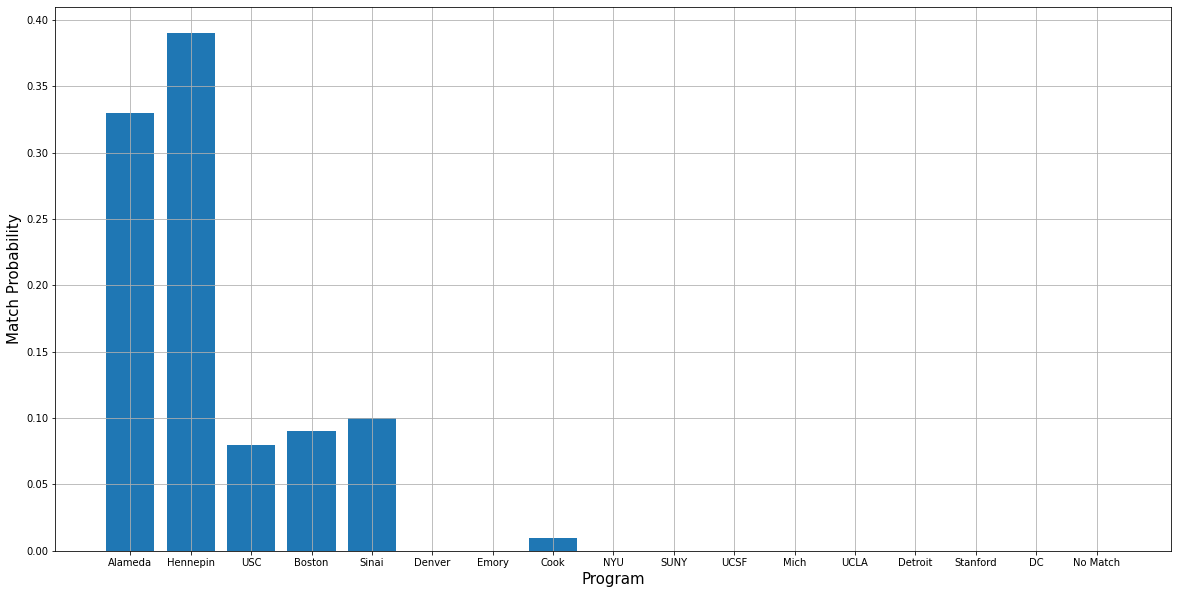

In [ ]:
count = f_Monte_Carlo_Matching(quotas,rating_n,dw_list,DW)
f_Plot(programs,count)

Turn up the noise:

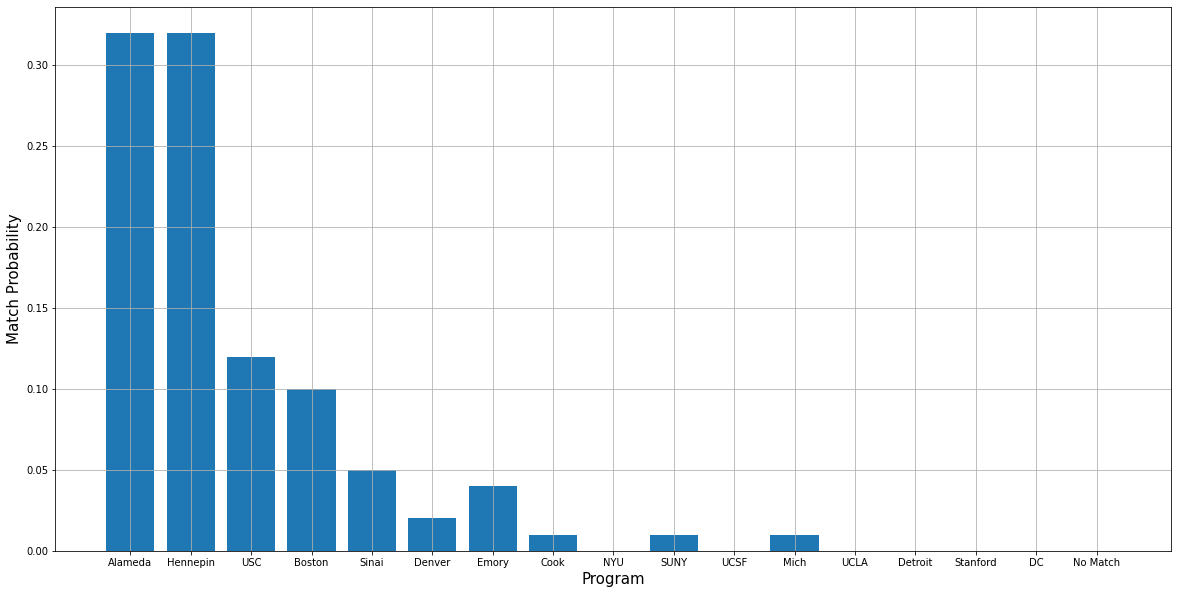

In [ ]:
count = f_Monte_Carlo_Matching(quotas,rating_n,dw_list,DW,student_noise=1/2,school_noise=1/3)
f_Plot(programs,count)

Really noisy student choices:

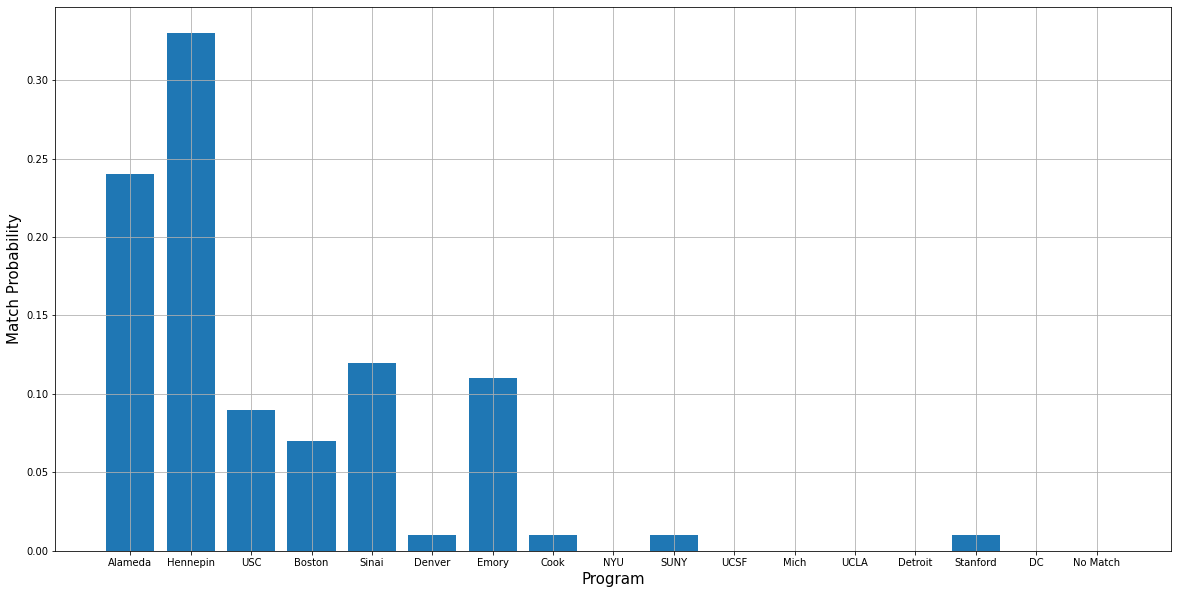

In [ ]:
count = f_Monte_Carlo_Matching(quotas,rating_n,dw_list,DW,school_noise=1/3,rating_exp=0)
f_Plot(programs,count)

Lower DW to 75th percentile

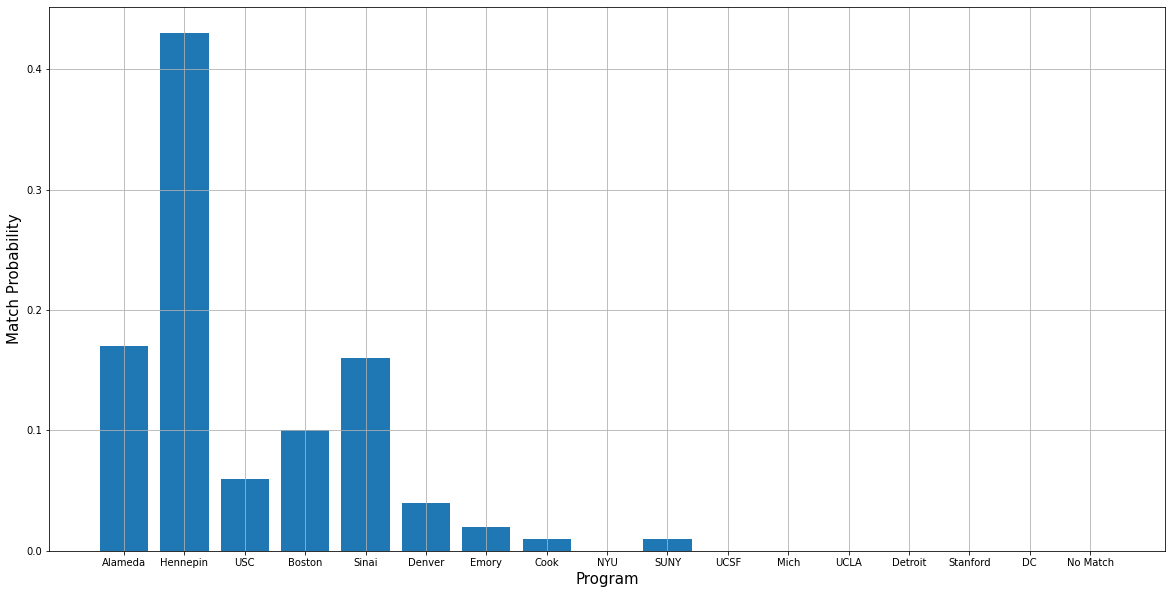

In [ ]:
count = f_Monte_Carlo_Matching(quotas,rating_n,dw_list,DW,DW_percentile=0.75)
f_Plot(programs,count)

Lower DW to 50th percentile

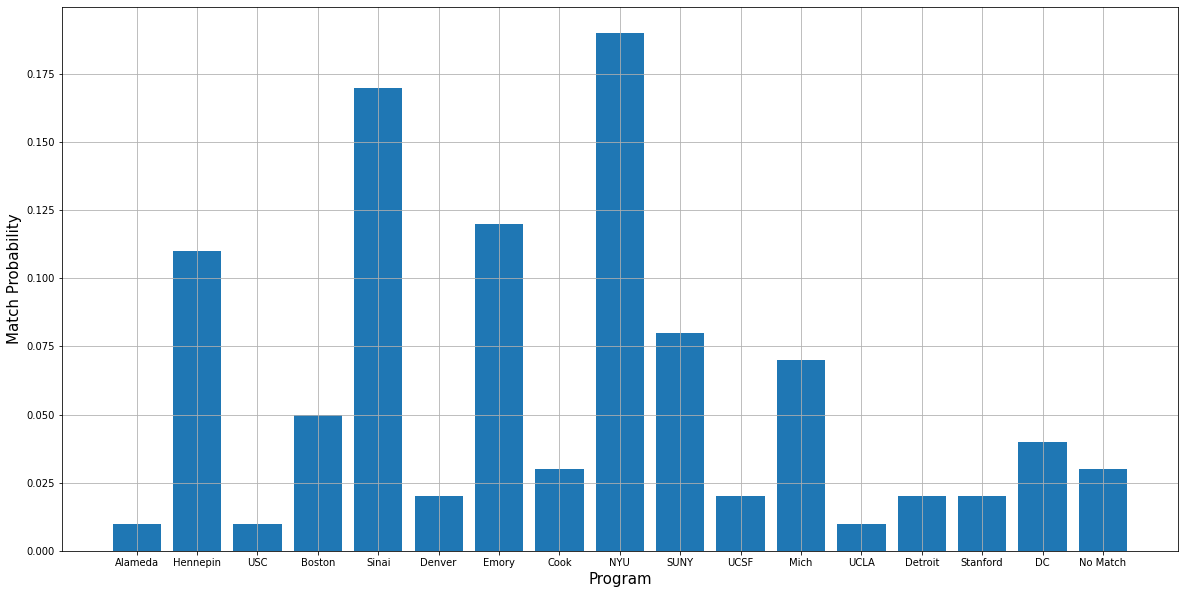

In [ ]:
count = f_Monte_Carlo_Matching(quotas,rating_n,dw_list,DW,DW_percentile=0.5)
f_Plot(programs,count)

Lower DW to 15th percentile

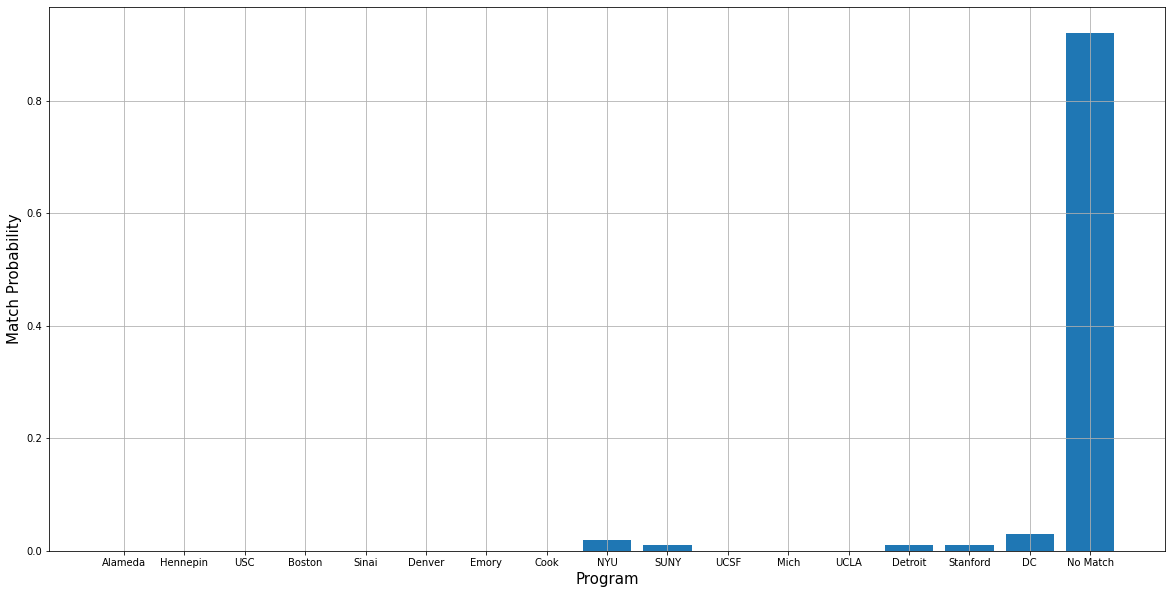

In [ ]:
count = f_Monte_Carlo_Matching(quotas,rating_n,dw_list,DW,DW_percentile=0.15)
f_Plot(programs,count)